In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
D=2
s=4

In [12]:
mu1=np.array([0,0])
mu2=np.array([s,s])
mu3=np.array([0,s])

In [13]:
N=900

In [14]:
X=np.zeros((N,D))

In [15]:
X.shape

(900, 2)

In [16]:
X[:300,:]=np.random.randn(300,D)+mu1

In [17]:
X[300:-300,:]=np.random.randn(300,D)+mu2

In [18]:
X[-300:,:]=np.random.randn(300,D)+mu3

In [19]:
X

array([[ 0.68573287, -0.5251392 ],
       [ 0.15292798, -1.75785054],
       [ 0.94268922,  2.1062337 ],
       ...,
       [ 1.98141895,  4.59268589],
       [ 0.48256566,  3.48136896],
       [-0.60469673,  3.35294136]])

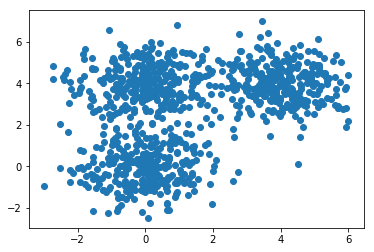

In [20]:
plt.scatter(X[:,0],X[:,1])

In [118]:
K=3

In [119]:
c1,c2,c3=X[np.random.choice(N,K)]

In [120]:
def distance(x1,x2):
    diff=x1-x2
    return np.sqrt((diff**2).sum())

In [193]:
def cost_kmeans(X,C,y):
    cost=0
    for k in range(len(C)):
        for n in np.where(y==k):
            cost+=distance(X[n],C[k])
    return cost

In [194]:
y=np.zeros(N)

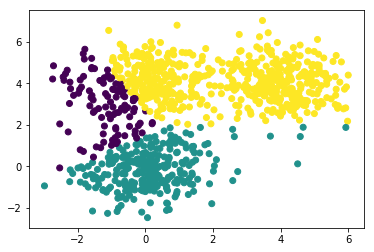

1 87.78480846913891


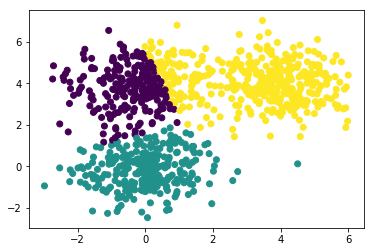

2 77.54529054752578


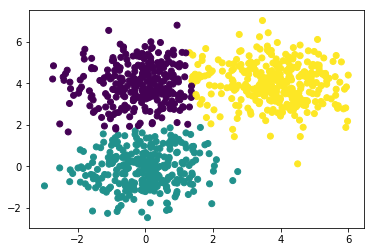

3 71.07642250237105


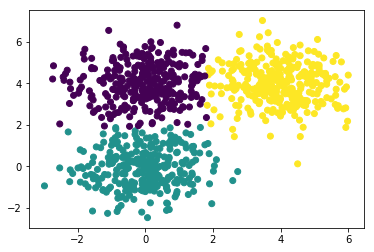

4 70.06040630119067


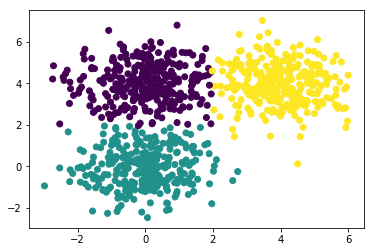

5 69.94067206151095


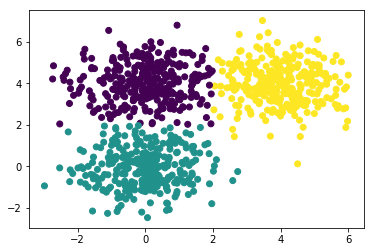

6 69.93027655710917


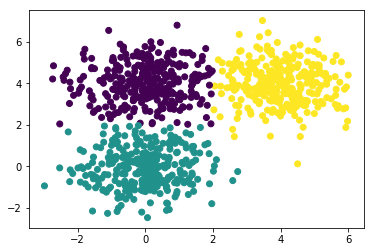

In [195]:
c1,c2,c3=X[np.random.choice(N,K)]
y=np.zeros(N)
iter=0
while True:
    iter=iter+1
    for i in range(900):
        d=distance(X[i],c1),distance(X[i],c2),distance(X[i],c3)
        y[i]=np.argmin(d)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()
    if (c1==X[np.where(y==0)].mean(axis=0)).all() and (c2==X[np.where(y==1)].mean(axis=0)).all() and (c3==X[np.where(y==2)].mean(axis=0)).all():
        break
    c1=X[np.where(y==0)].mean(axis=0)
    c2=X[np.where(y==1)].mean(axis=0)
    c3=X[np.where(y==2)].mean(axis=0)
    print(iter,cost_kmeans(X,[c1,c2,c3],y))

In [124]:
list(X[np.random.choice(N,K)])

[array([1.94268038, 2.04699105]),
 array([ 1.40465163, -0.87291094]),
 array([4.54670516, 2.99463756])]

In [125]:
# Soft K-Means
C=list(X[np.random.choice(N,K)])
y=np.zeros(N)

In [126]:
R=np.zeros((N,K))

In [127]:
R.shape

(900, 3)

In [128]:
b=1.0

In [129]:
exps=np.empty((N,K))

In [131]:
exps.shape

(900, 3)

In [140]:
iter=iter+1
for i in range(900):
    d=distance(X[i],C[0]),distance(X[i],C[1]),distance(X[i],C[2])
    d=np.array(d)
    exps[i,:]=np.exp(-b*d)
R=exps/exps.sum(axis=1,keepdims=True)

In [146]:
y=R.argmax(axis=1)

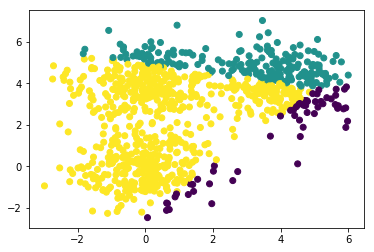

In [147]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [156]:
new_C = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
if (C==new_C).all():
    break

In [160]:
(C==(R.T.dot(X) / R.sum(axis=0, keepdims=True).T)).all()

True

In [155]:
R.sum(axis=0, keepdims=True).T

array([[236.83977147],
       [269.69765018],
       [393.46257835]])

In [137]:
C = R.T.dot(X) / R.sum(axis=0, keepdims=True).T

array([[1., 2., 3.],
       [0., 0., 0.]])

In [185]:
(R[:,0]*distance(X,C[0])).sum()

36865.03143575383

In [196]:
def cost_kmeans_soft(X,C,R):
    cost = 0
    for k in range(len(C)):
        # method 2
        diff = X - C[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

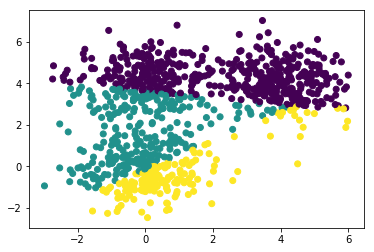

1 9979.123697653831


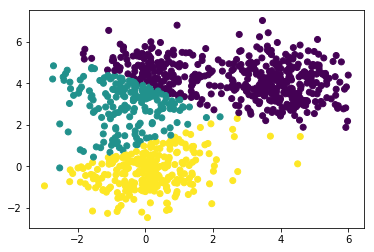

2 5802.838371897538


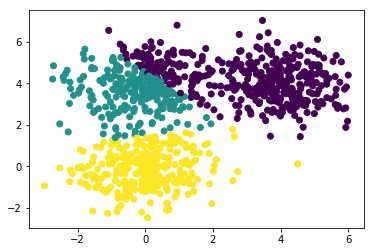

3 5167.721300340892


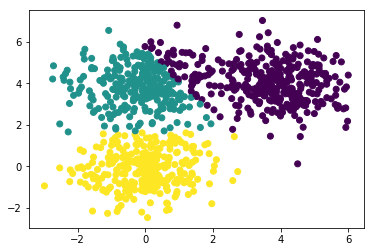

4 4577.660800198513


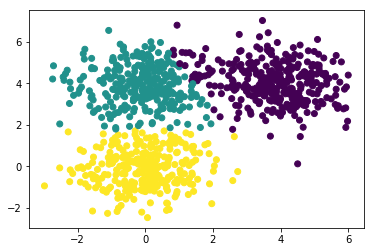

5 3910.152883836703


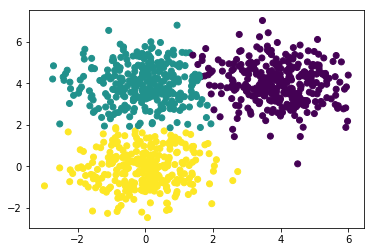

6 3282.5250277688892


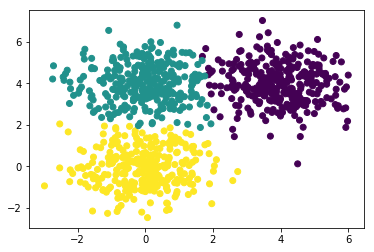

7 2954.456637423034


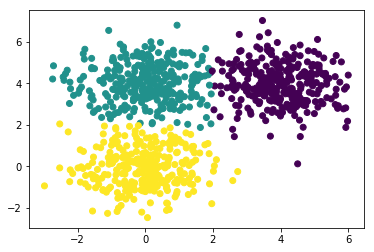

8 2847.097238135839


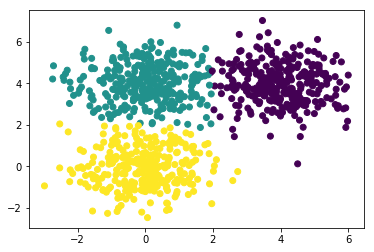

9 2817.402487964356


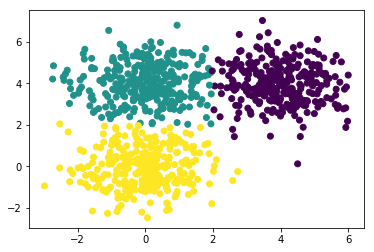

10 2809.3851195110688


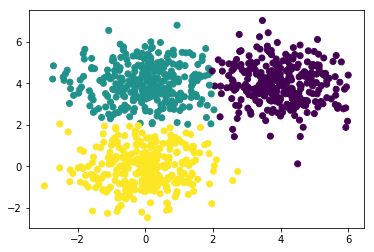

11 2807.2208465663207


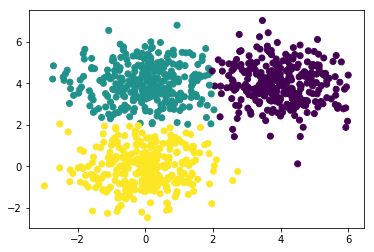

12 2806.636375451015


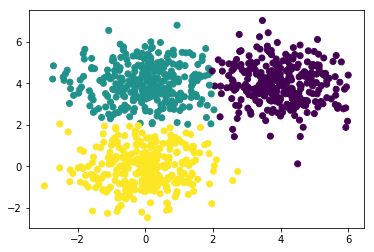

13 2806.4785531300768


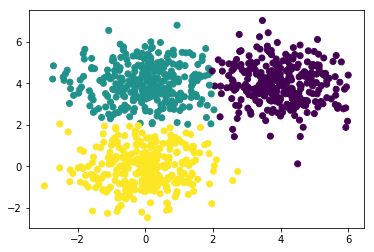

14 2806.4359359688056


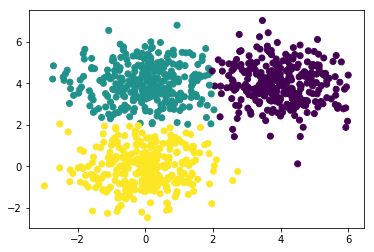

15 2806.4244230147606


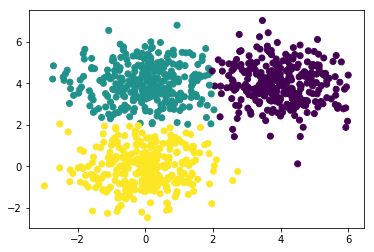

16 2806.4213099596736


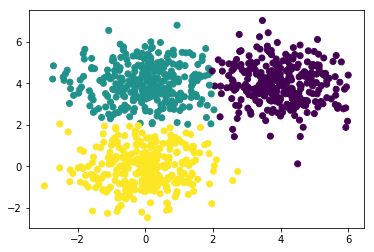

17 2806.4204669701253


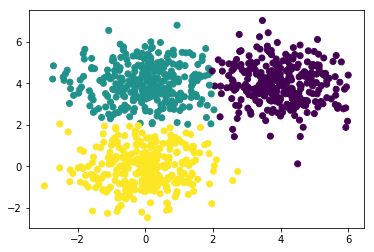

18 2806.4202382110498


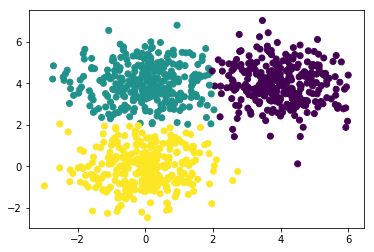

19 2806.4201759484713


In [199]:
# Soft K-Means
C=list(X[np.random.choice(N,K)])
R=np.zeros((N,K))
b=1.0
exps=np.empty((N,K))
iter=0
while True:
    iter=iter+1
    for i in range(900):
        d=distance(X[i],C[0]),distance(X[i],C[1]),distance(X[i],C[2])
        d=np.array(d)
        exps[i,:]=np.exp(-b*d)
    R=exps/exps.sum(axis=1,keepdims=True)
    y=R.argmax(axis=1)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()
    print(iter,cost_kmeans_soft(X,C,R))
    new_C = R.T.dot(X)/ R.sum(axis=0, keepdims=True).T
    if np.abs((C-new_C).sum())<0.00001:
        break
    C=new_C

In [200]:
y=np.zeros(N)

In [215]:
def soft_kmeans(X,K=3,b=1.0):
    # Soft K-Means
    N=X.shape[0]
    y=np.zeros((N,K))
    C=list(X[np.random.choice(N,K)])
    exps=np.empty((N,K))
    iter=0
    
    while True:
        iter=iter+1
        for i in range(N):
            d=[]
            for k in range(K):
                d.append(distance(X[i],C[k]))
            d=np.array(d)
            exps[i,:]=np.exp(-b*d)
        R=exps/exps.sum(axis=1,keepdims=True)
        y=R.argmax(axis=1)
        plt.scatter(X[:,0],X[:,1],c=y)
        plt.show()
        print(iter,cost_kmeans_soft(X,C,R))
        new_C = R.T.dot(X)/ R.sum(axis=0, keepdims=True).T
        if np.abs((C-new_C).sum())<0.01:
            break
        C=new_C

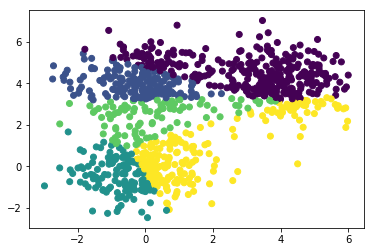

1 6951.827944556642


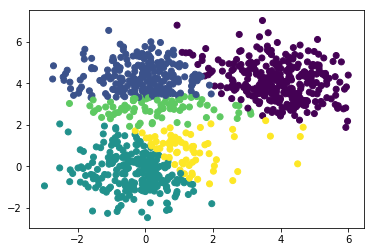

2 4801.534483203585


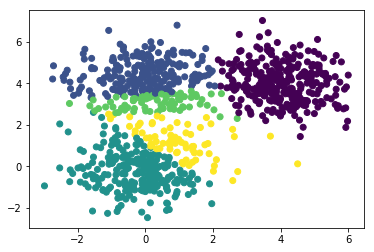

3 4169.955574863331


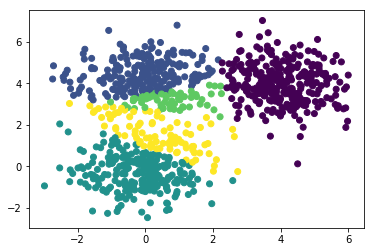

4 3570.486680935923


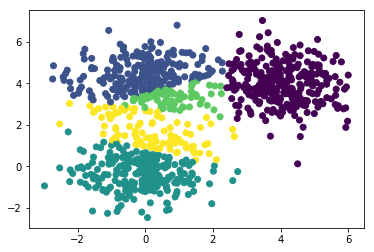

5 3258.996520477771


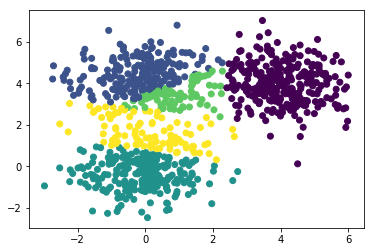

6 3141.1697317081766


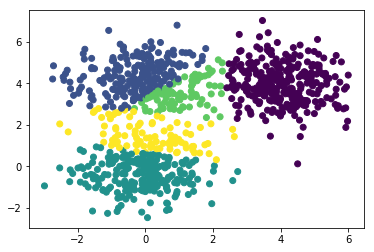

7 3091.594343806201


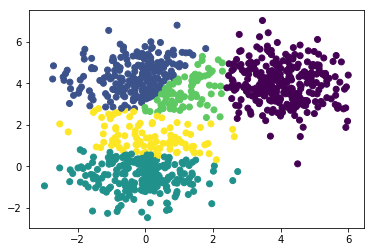

8 3064.325365621193


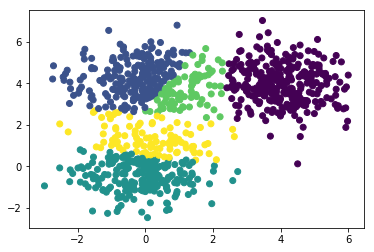

9 3045.62518841016


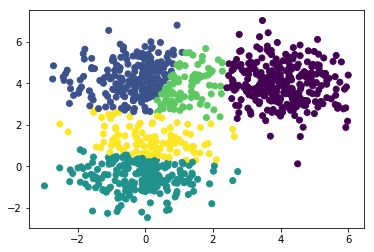

10 3031.2985978279453


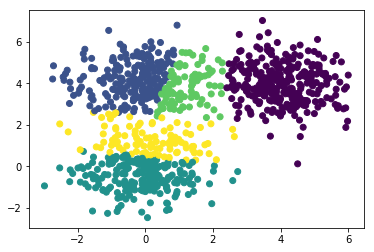

11 3020.066658485208


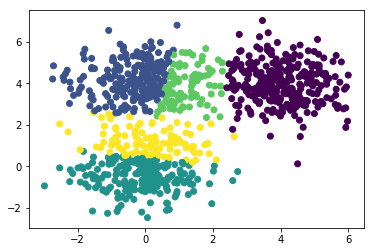

12 3011.358855292241


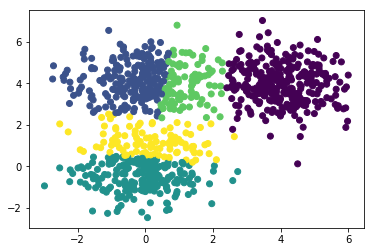

13 3004.625355806218


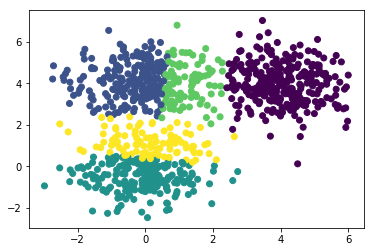

14 2999.3947895783317


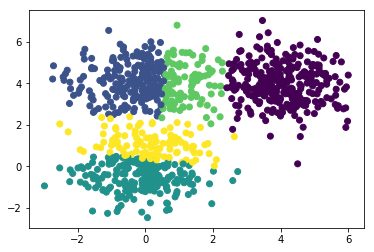

15 2995.324182695659


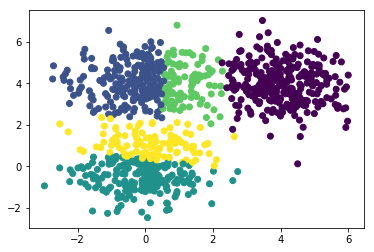

16 2992.1660084136324


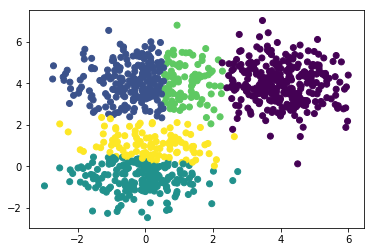

17 2989.7338750109902


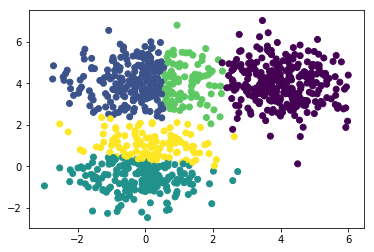

18 2987.869143090131


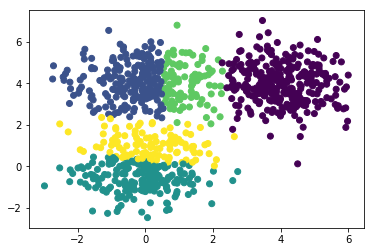

19 2986.4373371339443


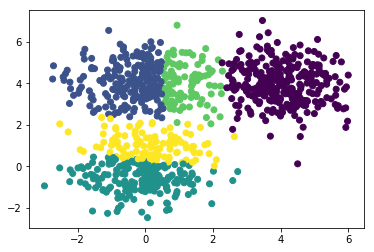

20 2985.3493912375307


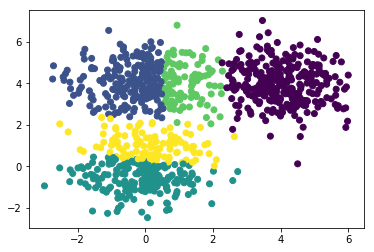

21 2984.515171720129


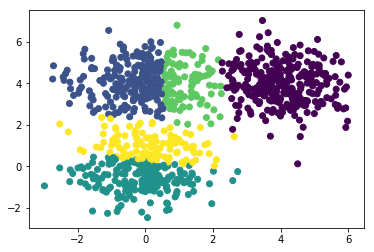

22 2983.865068279535


In [216]:
soft_kmeans(X,K=5)

In [217]:
def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

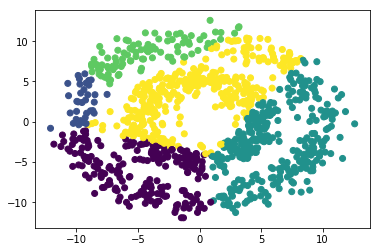

1 42605.826599230124


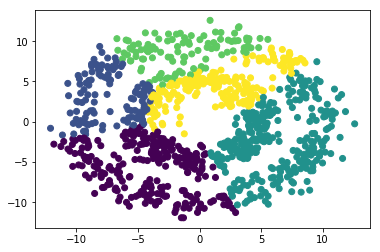

2 22081.187554397955


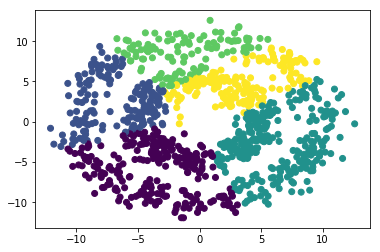

3 19084.793291252972


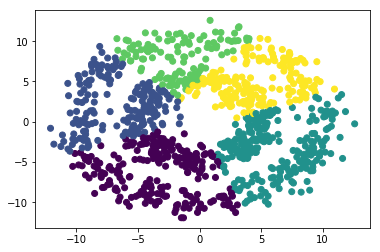

4 17438.05215852378


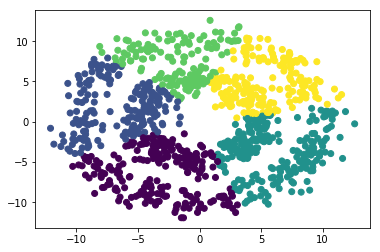

5 16423.07833061536


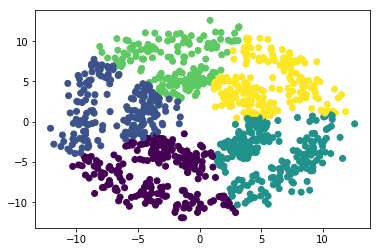

6 16027.35682661911


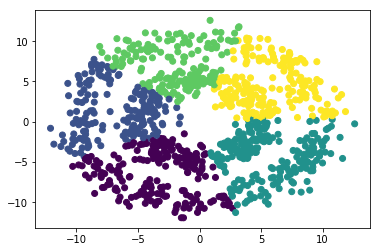

7 15869.556536471318


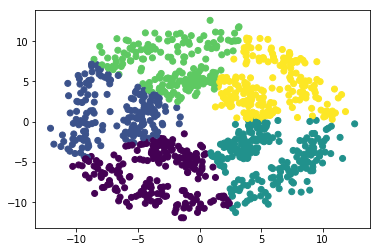

8 15789.486111978133


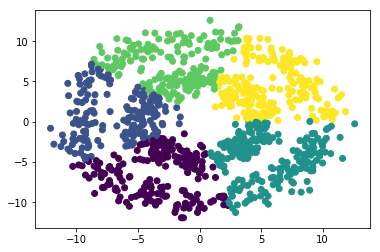

9 15743.985143959511


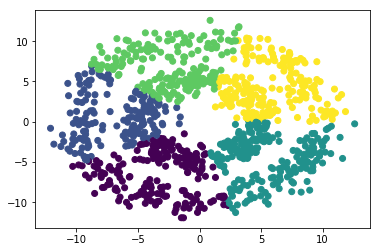

10 15714.62200395847


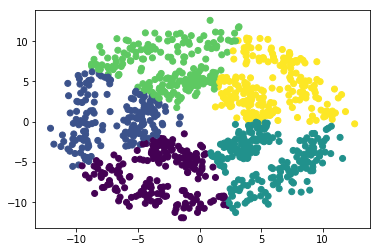

11 15692.112087437741


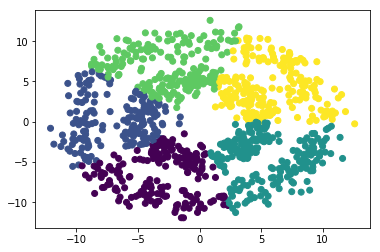

12 15671.786144133954


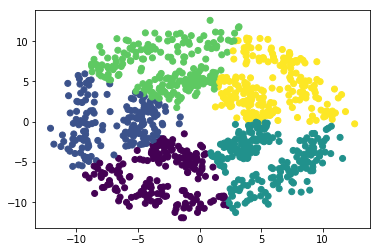

13 15651.38020525602


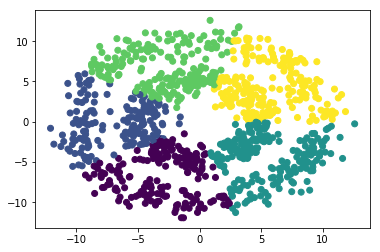

14 15629.914454300033


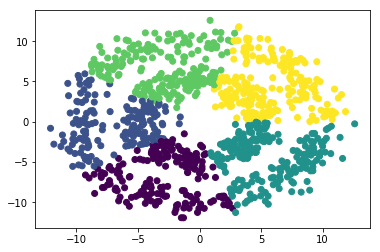

15 15607.121904099315


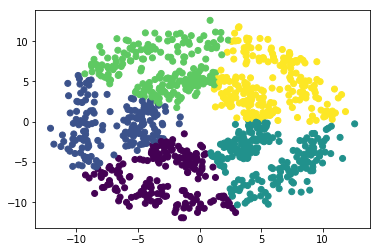

16 15583.125637460049


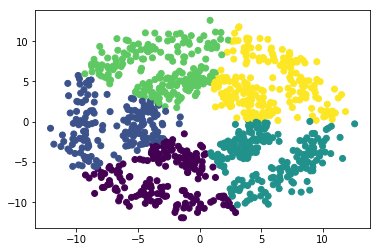

17 15558.219958134496


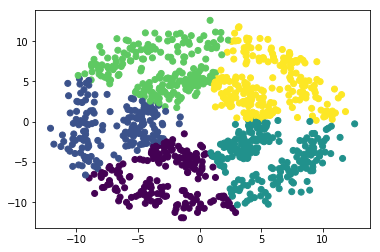

18 15532.716203383126


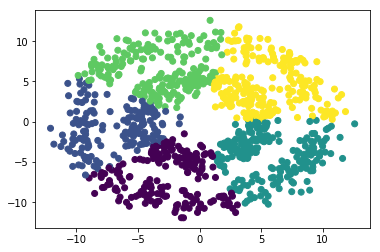

19 15506.83610831833


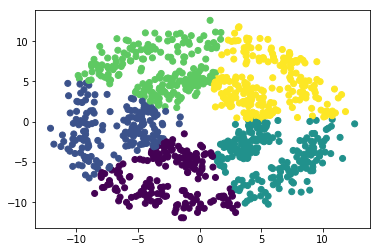

20 15480.672704775687


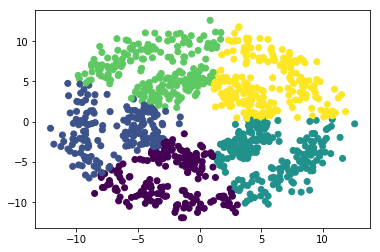

21 15454.244045404455


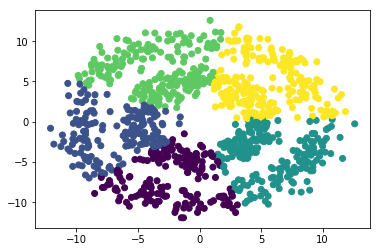

22 15427.544705714563


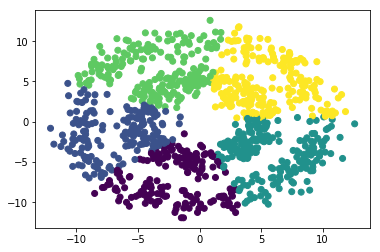

23 15400.605334776996


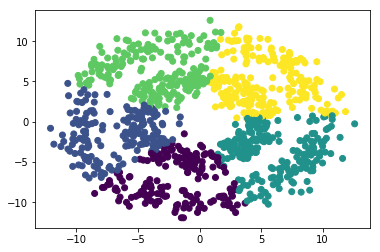

24 15373.533295416653


In [218]:
soft_kmeans(donut(),K=5)

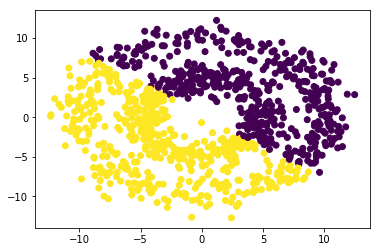

1 153242.38086436177


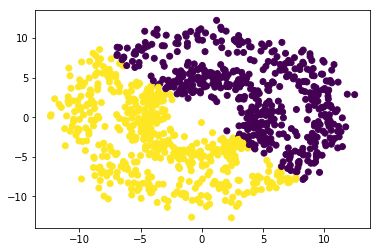

2 44905.90611401774


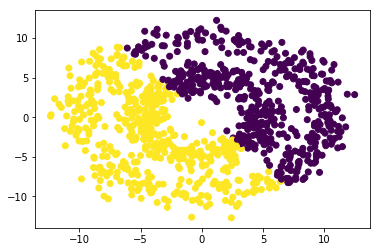

3 42562.7502866496


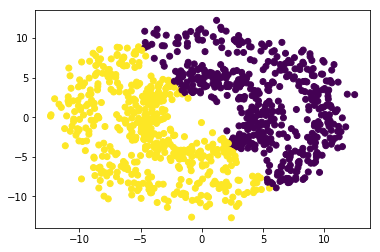

4 41529.981203908465


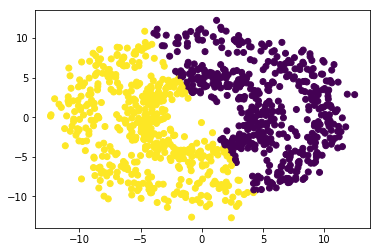

5 40672.71265872115


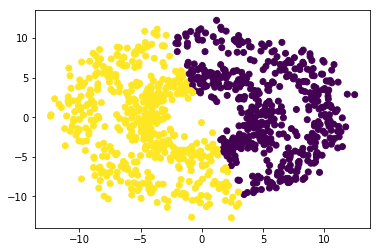

6 40076.429883300654


In [219]:
soft_kmeans(donut(),K=2)

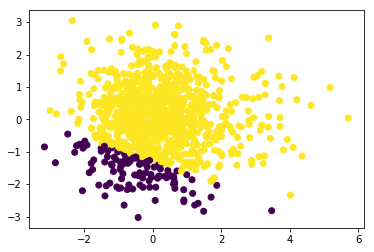

1 4046.9773009712308


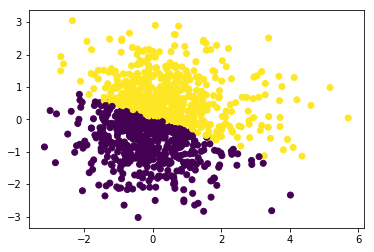

2 2515.767540933363


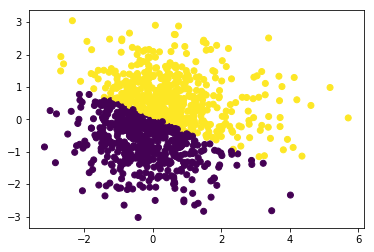

3 2516.6529599196465


In [220]:
# different density
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
soft_kmeans(X, 2)

In [221]:
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)

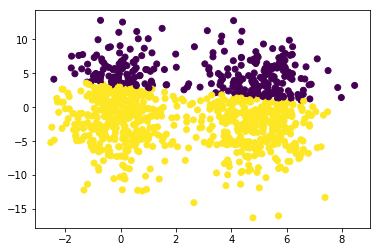

1 40792.80668671295


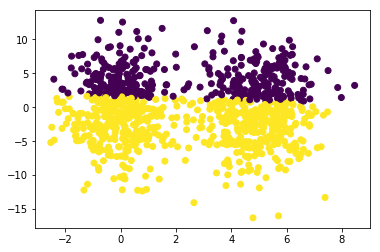

2 16824.5733523197


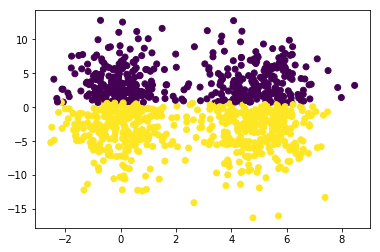

3 16076.343228128972


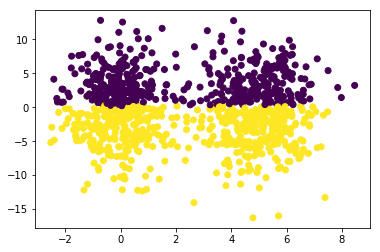

4 15837.913870363252


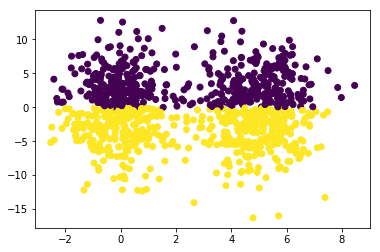

5 15762.38379794006


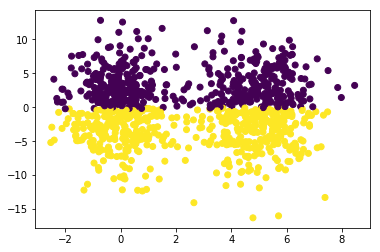

6 15737.095856594817


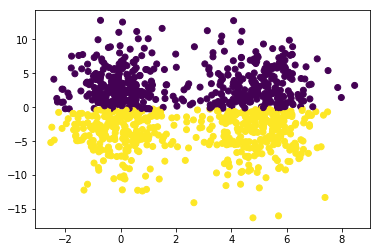

7 15728.304283081283


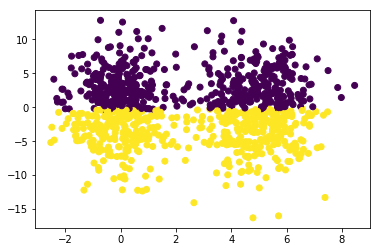

8 15725.194089024306


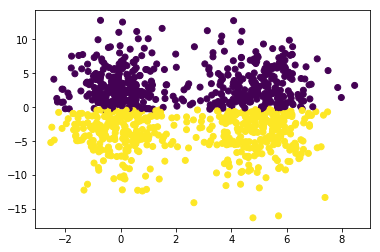

9 15724.090755926227


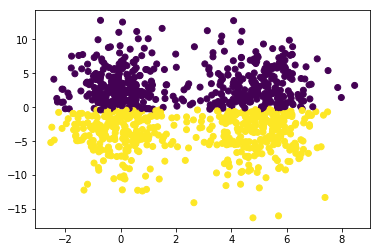

10 15723.703298805453


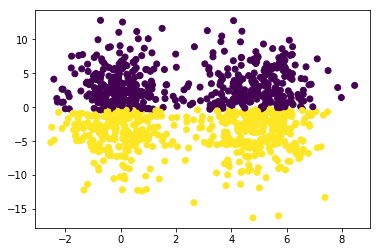

11 15723.570849850286


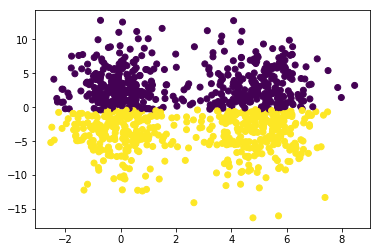

12 15723.528097788421


In [222]:
soft_kmeans(X, 2)